# Ejercicio de la Teoria - Agrupamiento (Clusteing K-means)
El archivo SEMILLAS.csv contiene información de granos que
pertenecen a tres variedades de trigo: Kama, Rosa y Canadiense

Describa los tipos de semillas inspeccionados utilizando el algoritmo K-medias

In [1]:
# Importaciones para realizar el Clustering k-means sobre un dataframe
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('semillas.csv')
df

,Area,Perimetro,Compacidad,LongNucleo,AnchoNucleo,Asimetria,LongSurco,Clase
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Tipo1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Tipo1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Tipo1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Tipo1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Tipo1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,Tipo3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,Tipo3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,Tipo3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,Tipo3


In [6]:
print(df.groupby('Clase').size())

Clase
Tipo1    70
Tipo2    70
Tipo3    70
dtype: int64


Confusion Matrix:
[[ 1 12 57]
 [66  2  2]
 [ 0 55 15]]
Accuracy Score:
0.08571428571428572


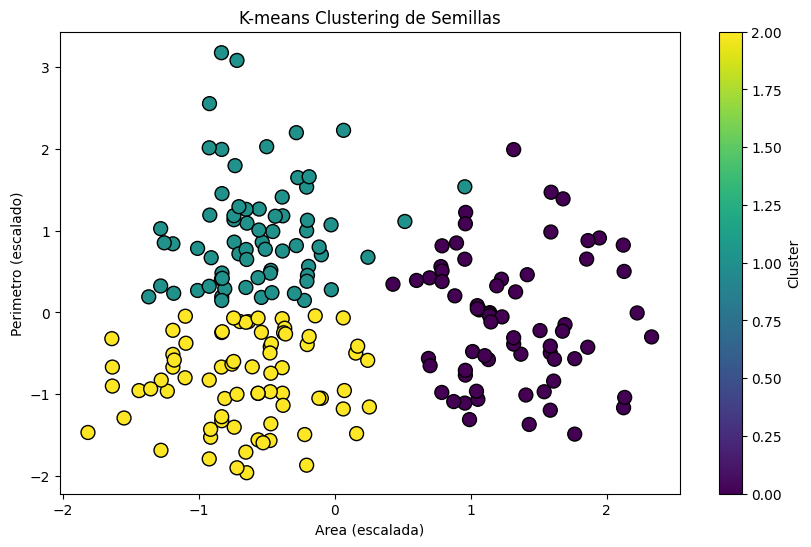

In [12]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Cargar el archivo CSV
df = pd.read_csv('semillas.csv')

# Separar las características y la etiqueta
X = df[['LongSurco', 'Asimetria']]
y = df['Clase']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Obtener las etiquetas predichas
y_pred = kmeans.labels_

# Convertir las etiquetas verdaderas a números si es necesario
y = pd.factorize(y)[0]

# Evaluar los resultados
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

print("Accuracy Score:")
print(accuracy_score(y, y_pred))

# Plotear los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.title('K-means Clustering de Semillas')
plt.xlabel('Area (escalada)')
plt.ylabel('Perimetro (escalado)')
plt.colorbar(label='Cluster')
plt.show()